In [1]:
from tqdm import tqdm

import numpy as np

from wpg.wpg_uti_wf import plot_intensity_map

from felpy.model.beamlines.exfel_spb.exfel_spb import Instrument
from wpg.optical_elements import Drift
from wpg.optical_elements import Mirror_elliptical as MirEl
from felpy.model.core.beamline import Beamline
from felpy.model.tools import propagation_parameters
from felpy.model.core.wavefront import Wavefront
from felpy.model.src.coherent import construct_SA1_wavefront
from felpy.model.beamlines.exfel_spb.methods import get_beamline_object, setup_spb
 

Initialising Single Particle Beamline
List of Elements: ['d1', 'HOM1', 'd2', 'HOM2', 'd3', 'NKB_PSlit', 'd4', 'NHE_error', 'NHE', 'd5', 'NVE_error', 'NVE']
List of Elements: ['d1', 'HOM1', 'd2', 'HOM2', 'd3', 'd4', 'NHE_error', 'NHE', 'd5', 'NVE_error', 'NVE']
List of Elements: ['d1', 'HOM1', 'd2', 'HOM2', 'd3', 'd4', 'NHE_error', 'NHE', 'd5', 'NVE_error', 'NVE']
Attention!!! The "total" polarization behavior sometimes strange. Use "horizontal" or "vertical".


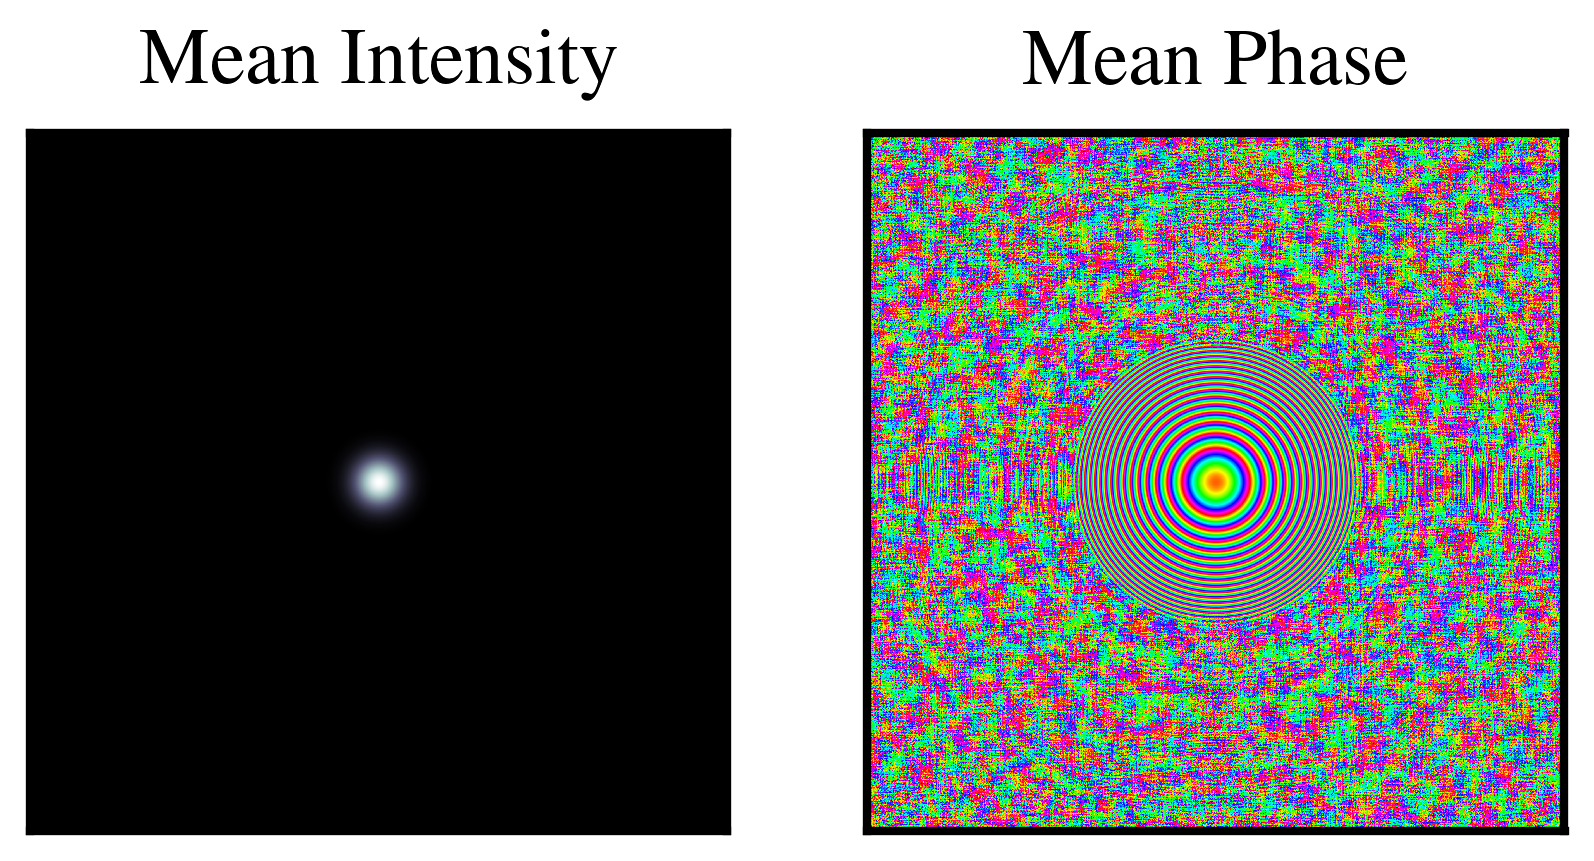

None
d1


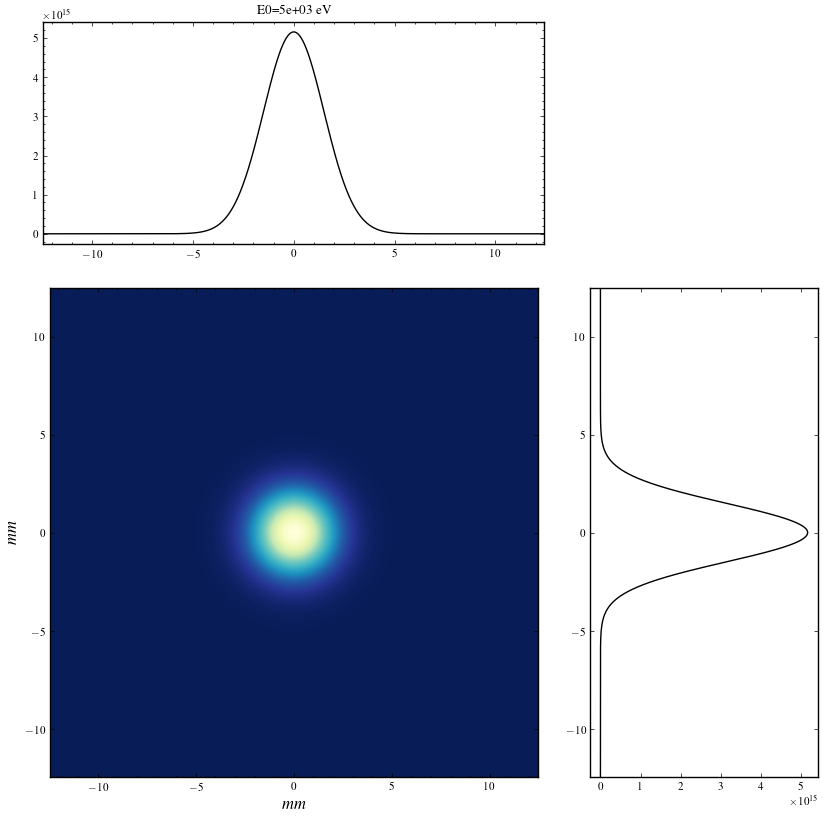

HOM1


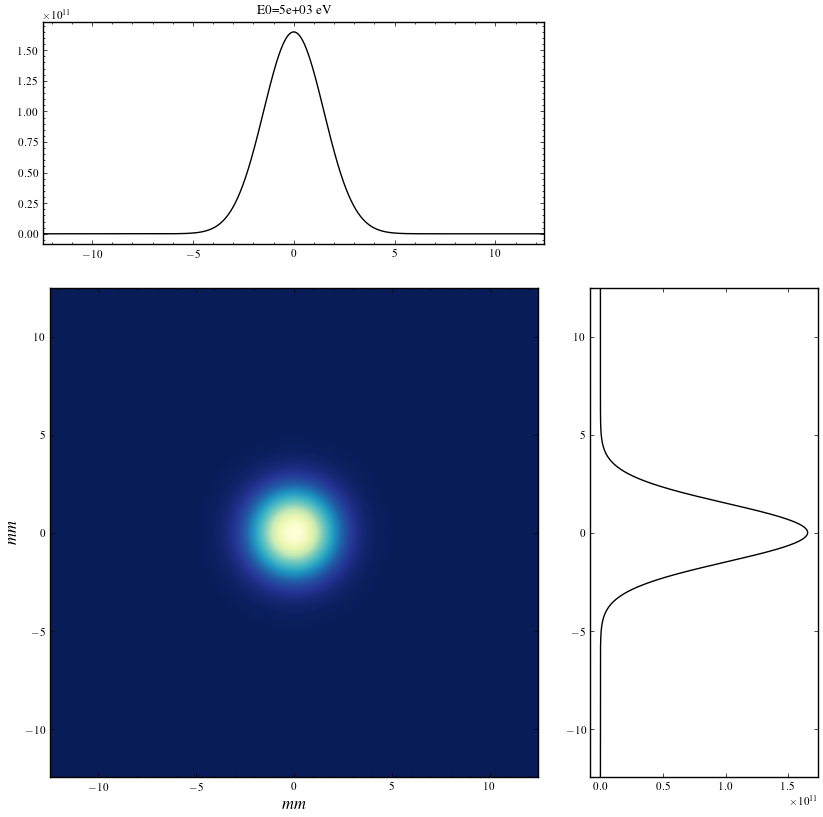

d2


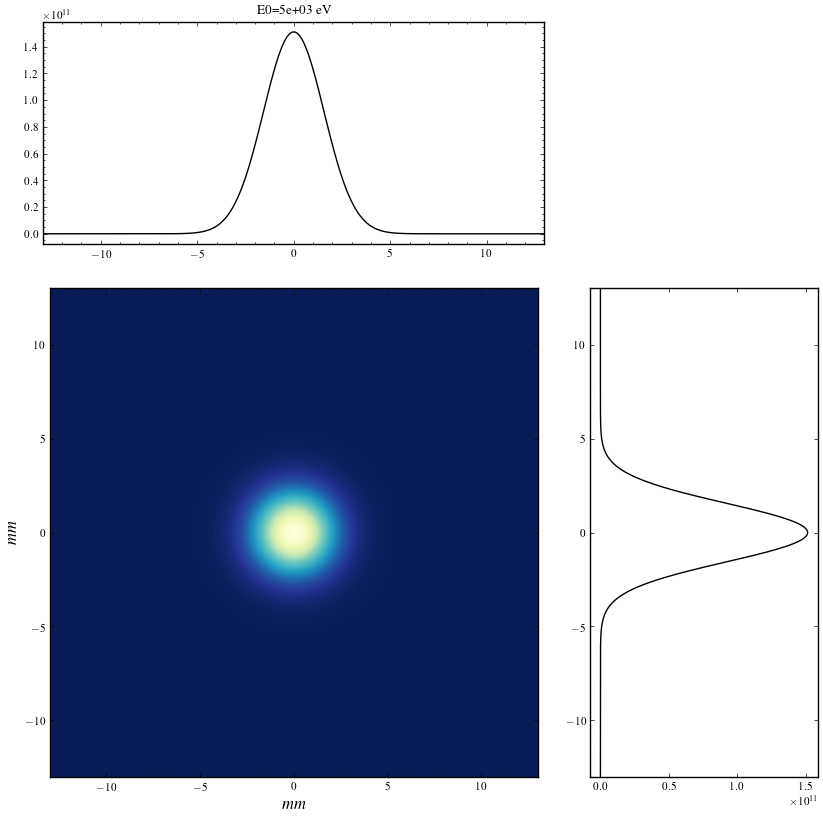

HOM2


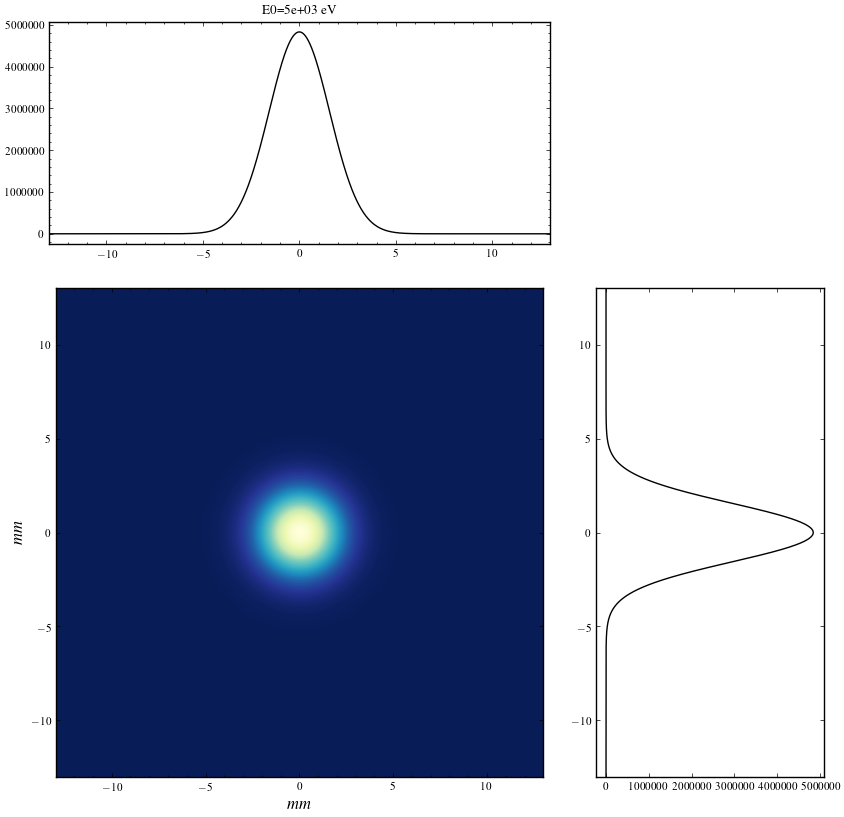

d3


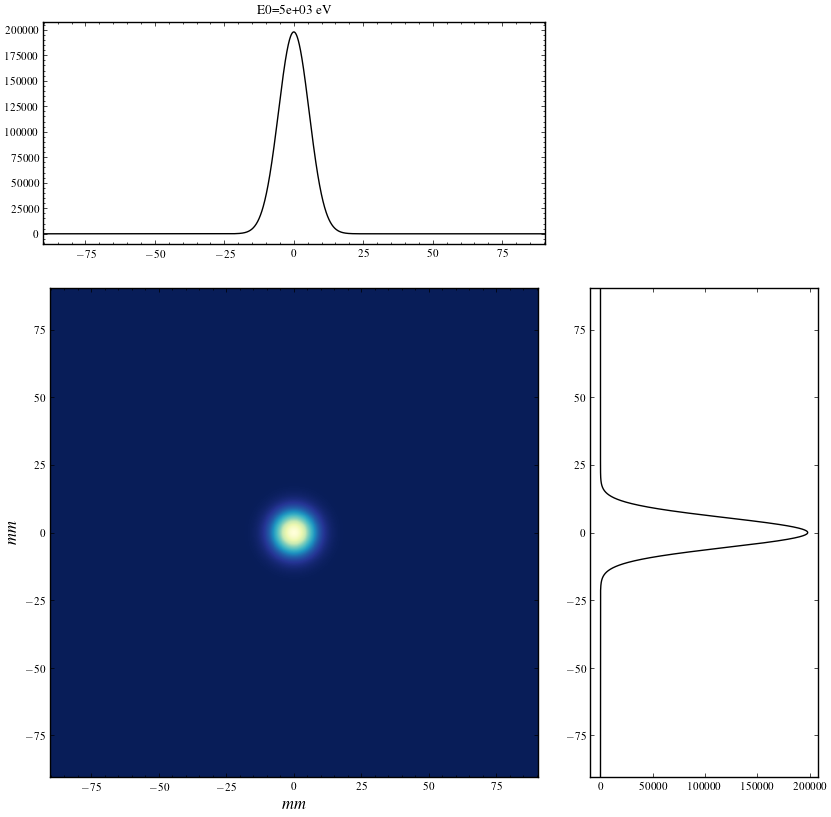

d4


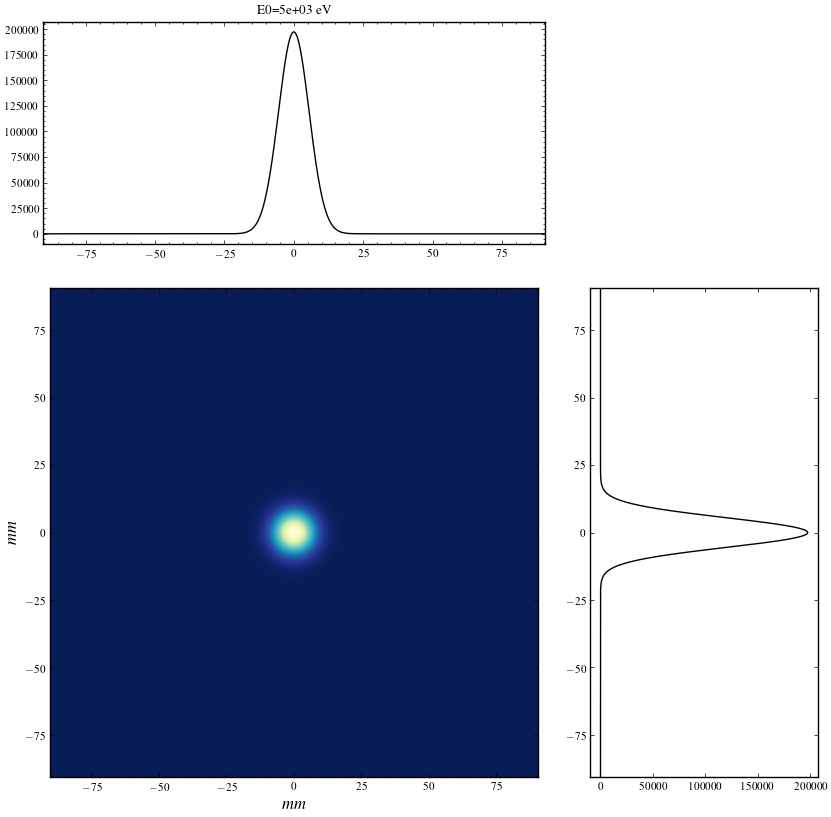

NHE_error


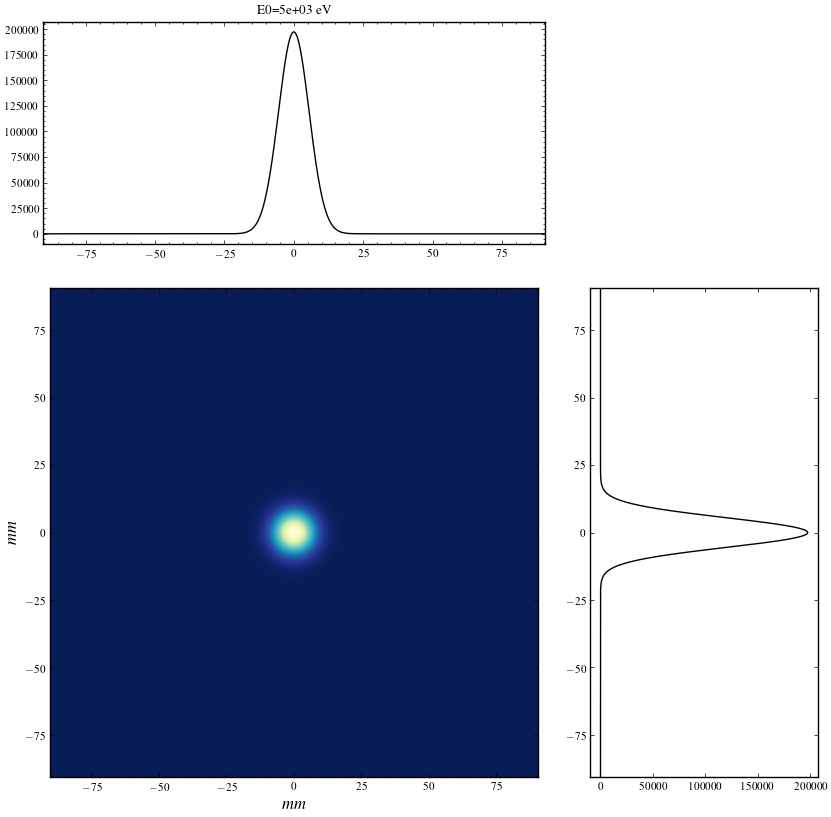

NHE


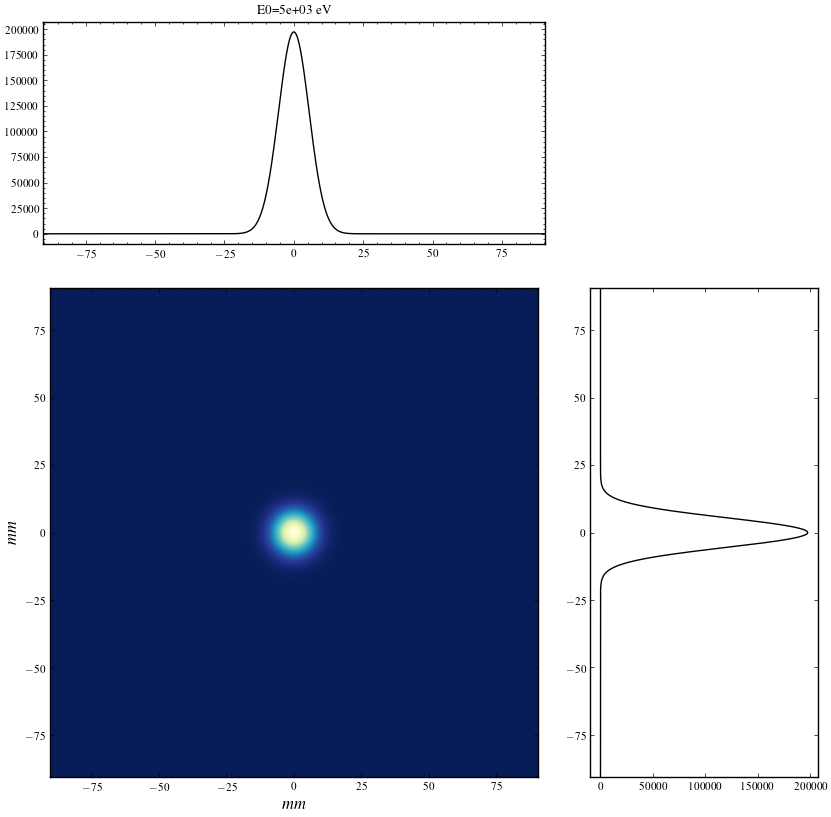

d5


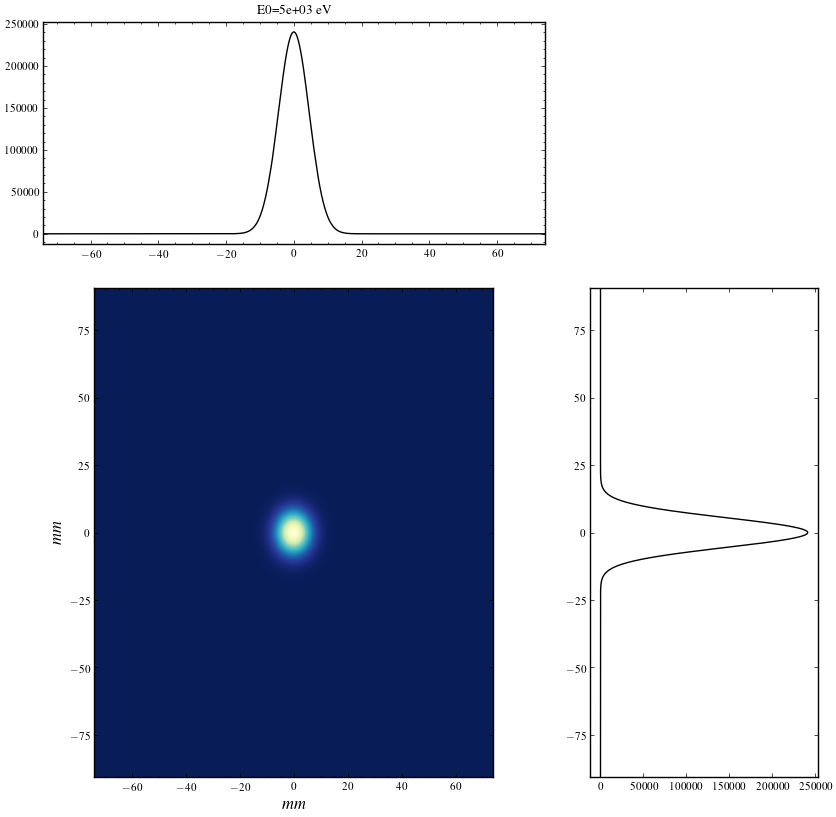

NVE_error


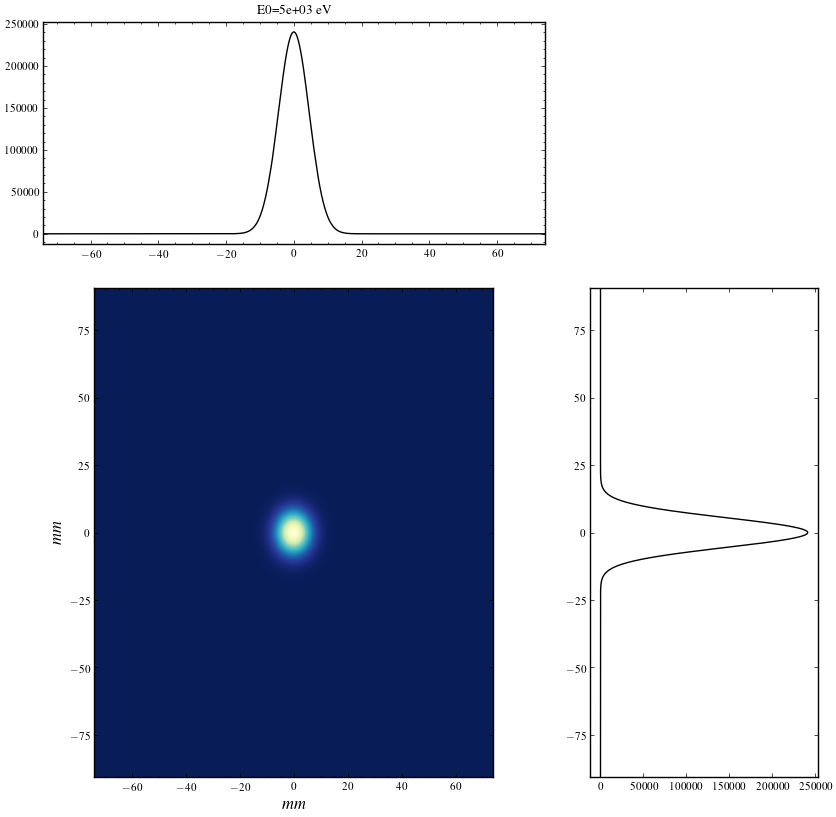

NVE


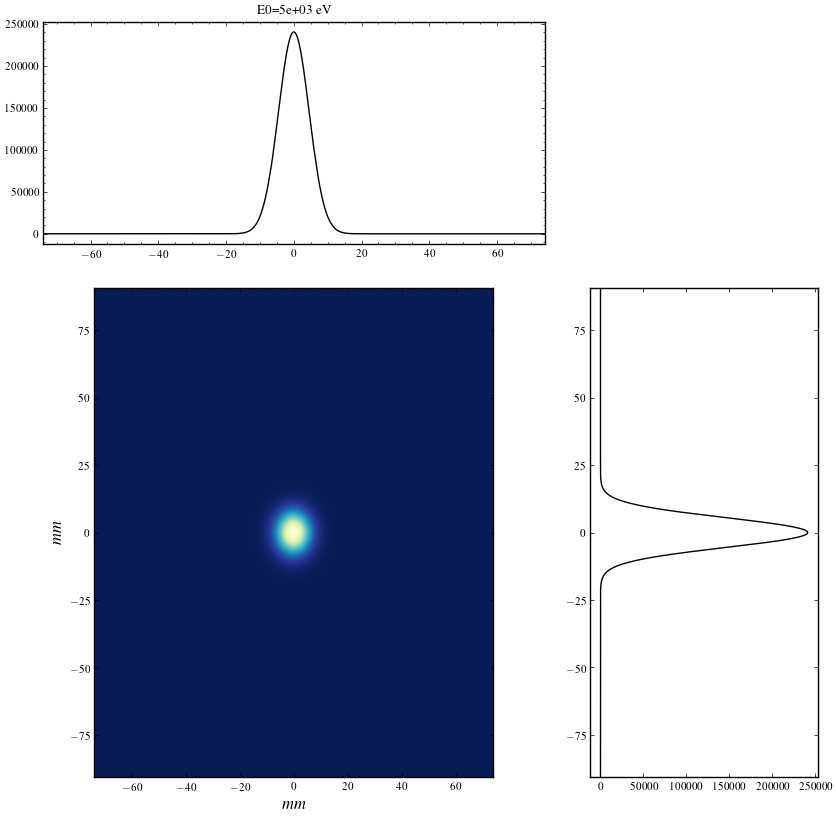

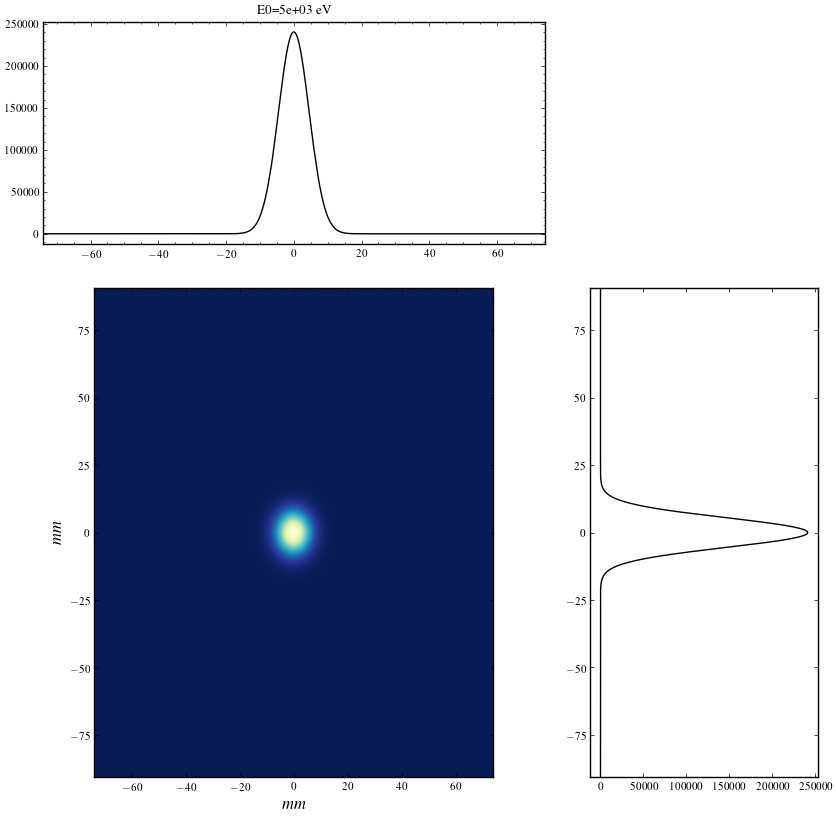

In [31]:
wfr = construct_SA1_wavefront(2500,2500,5,0.25)

spb = setup_spb(ekev = 12.0, apertures = False, surface = "flat", theta_HOM = 3.5e-03, theta_KB = 5e-03, save_params = True)
spb.remove_element("NKB_PSlit")
spb.edit_propagation_parameters("NVE_error", propagation_parameters(1,1,1,1))
spb.edit_propagation_parameters("NVE", propagation_parameters(1,1,1,1))

bl = spb.get_beamline()

bl.propagate_sequential(wfr)

 
plot_intensity_map(wfr)
wfr.store_hdf5("pre_focus.h5")



(array([0.00233393, 0.00254594]), 1.9652930009688256e-05)


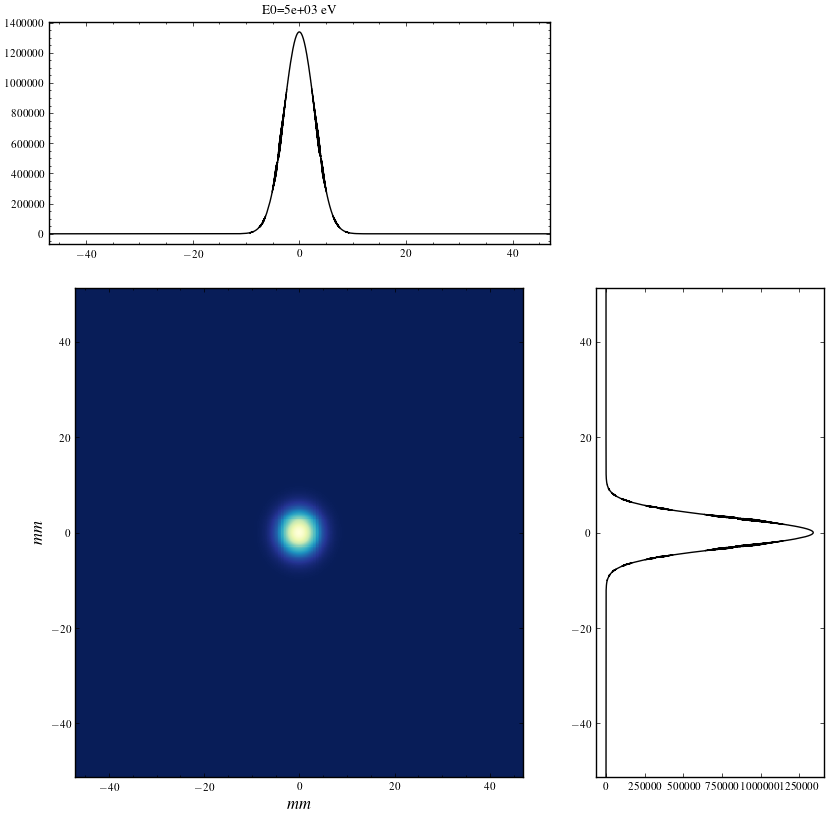

(array([0.00233394, 0.00254595]), 1.9639279477339416e-05)


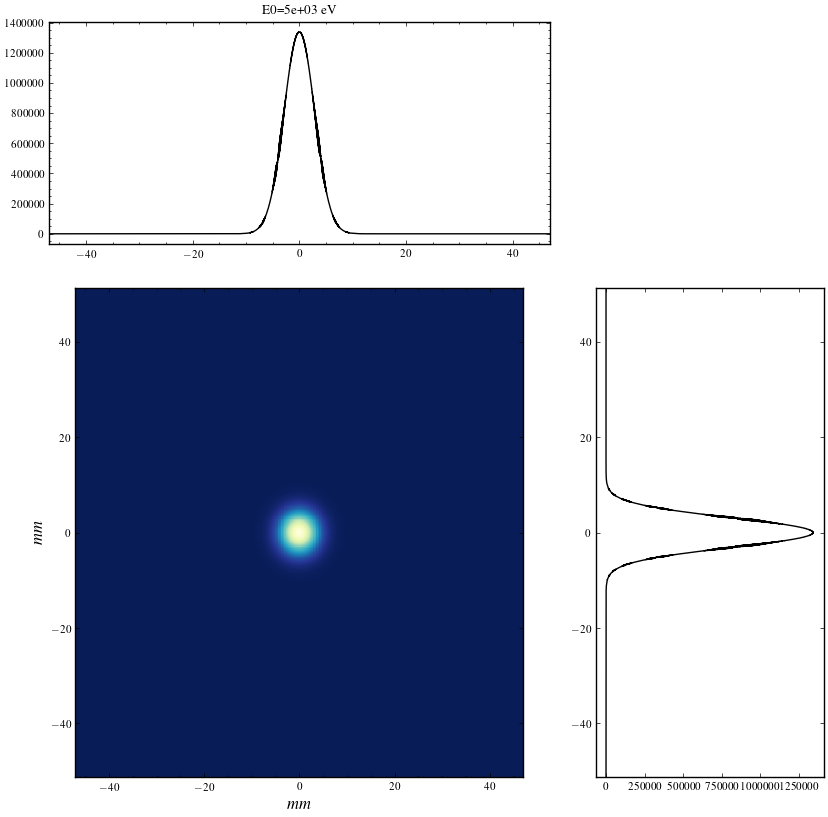

(array([0.00233396, 0.00254596]), 1.9626014164143123e-05)


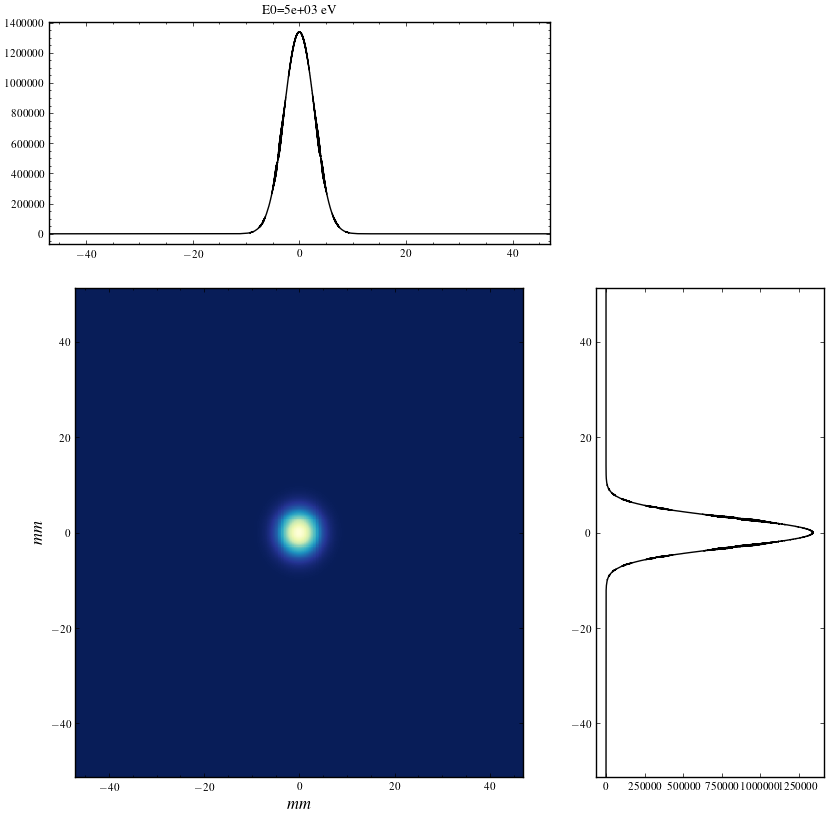

(array([0.00233397, 0.00254598]), 1.9612391761987598e-05)


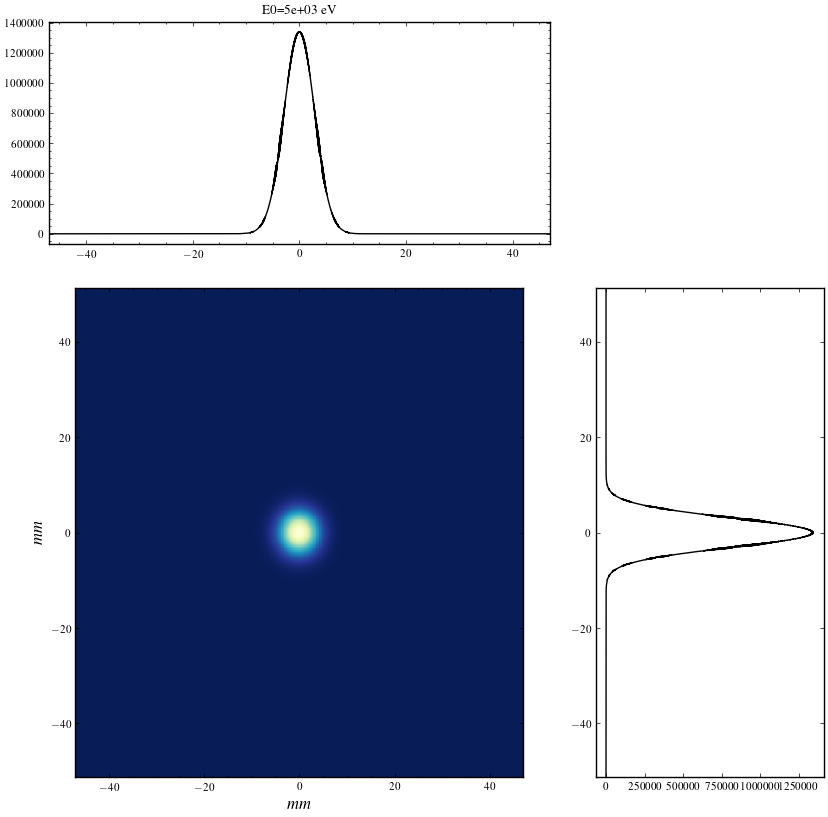

(array([0.00233398, 0.00254599]), 1.959900379730232e-05)


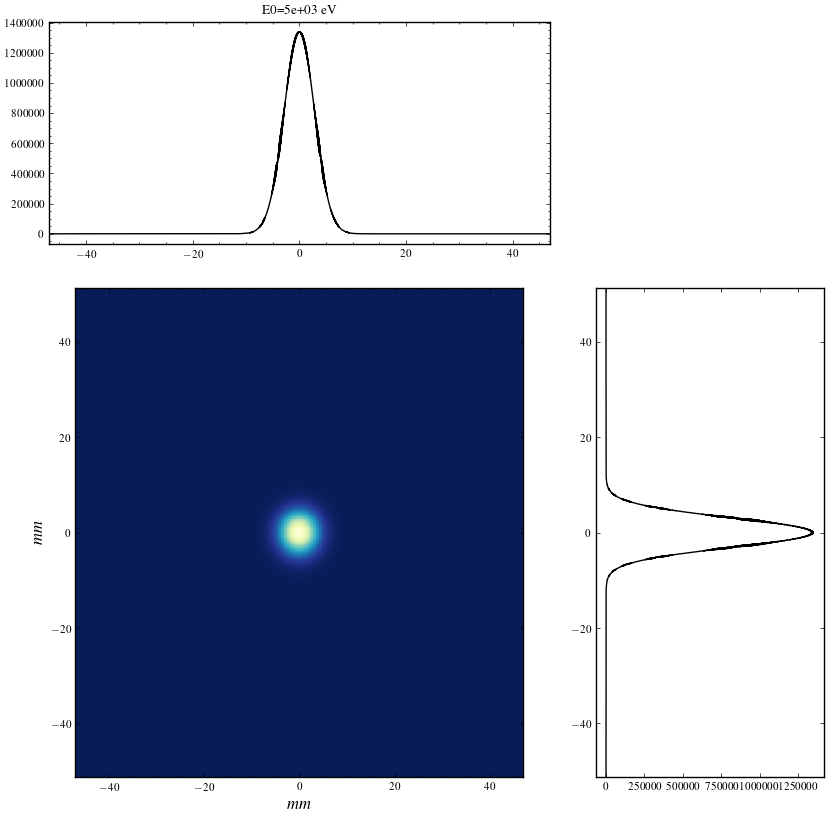

(array([0.00233399, 0.002546  ]), 1.95852257434333e-05)


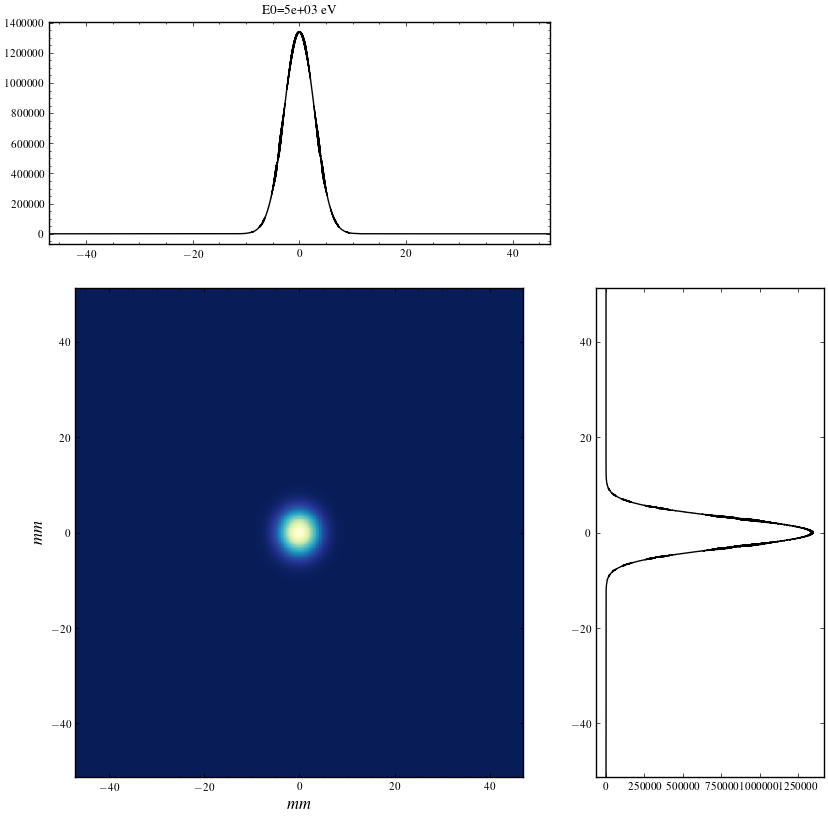

(array([0.002334  , 0.00254602]), 1.9571906689136744e-05)


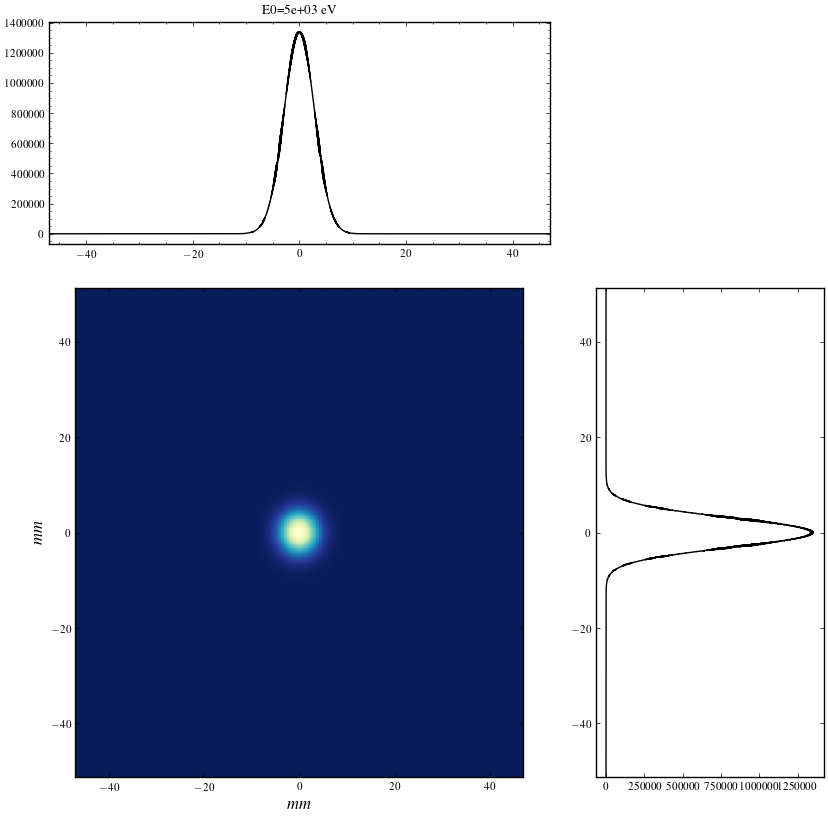

(array([0.00233402, 0.00254603]), 1.9559195935626563e-05)


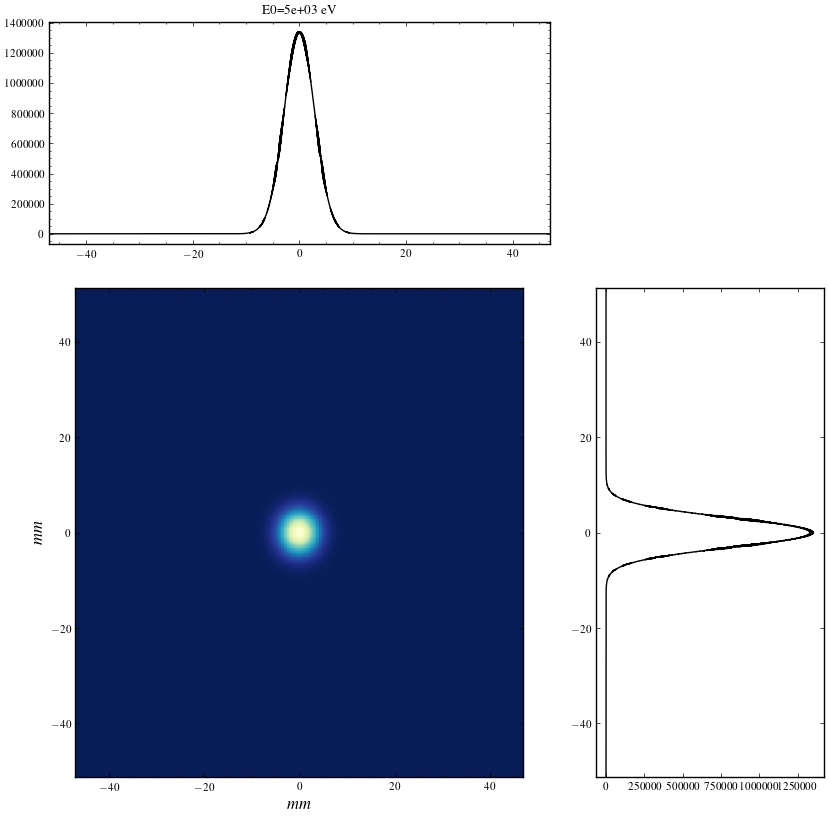

(array([0.00233403, 0.00254604]), 1.9545226207553123e-05)


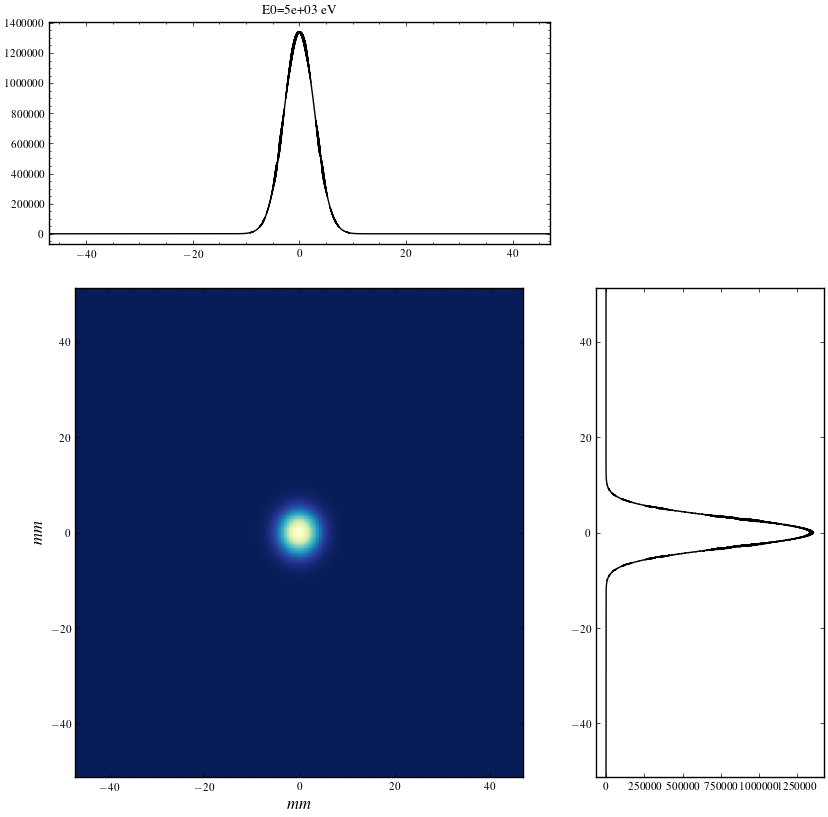

(array([0.00233404, 0.00254606]), 1.95313335060465e-05)


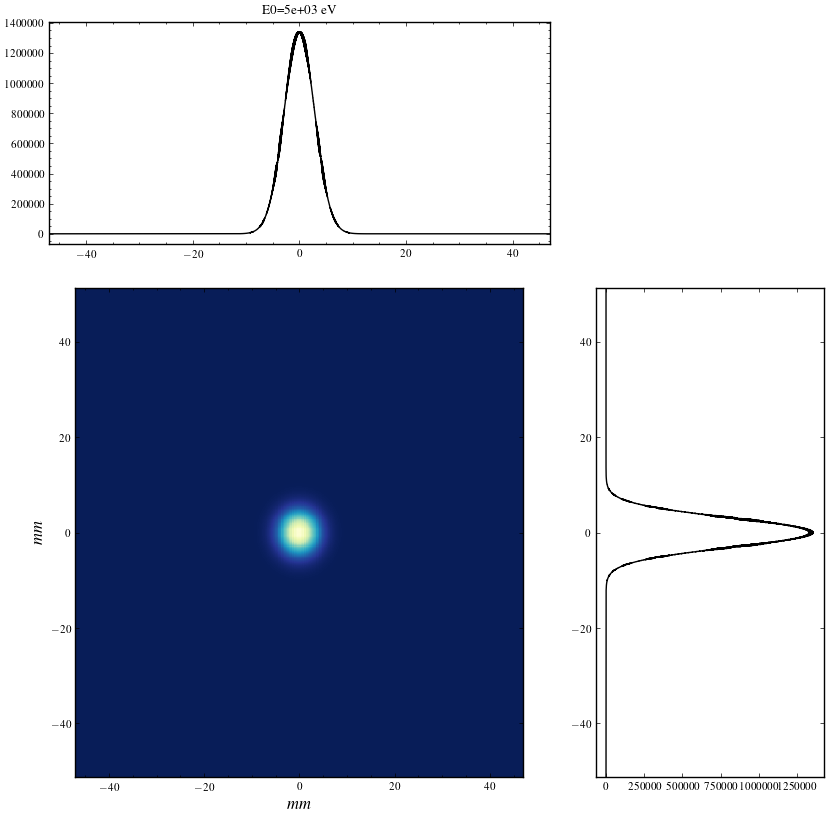

(array([0.00233405, 0.00254607]), 1.9517719666937523e-05)


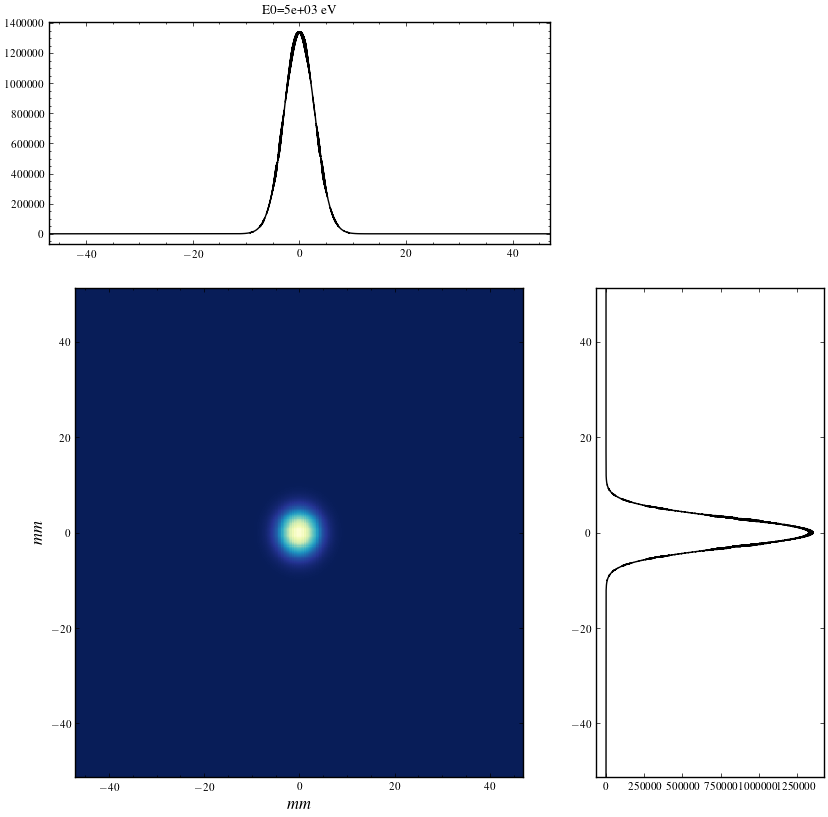

In [32]:
wfr = Wavefront()
wfr.load_hdf5("pre_focus.h5")
 

bl = Beamline()
bl.append(Drift(2.2 * 0.75), propagation_parameters(1,2,1,2, mode = 'quadratic'))
bl.propagate(wfr)
print(wfr.get_beam_size())
plot_intensity_map(wfr)

slice_interval = 2.2*0.25/100
for i in range(10):


    bl = Beamline()
    bl.append(Drift(slice_interval), propagation_parameters(1, 1, 1, 1, mode = 'fresnel'))
    bl.propagate(wfr)
    print(wfr.get_beam_size())
    

    plot_intensity_map(wfr)